In [28]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Table

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
inspector = inspect(engine)

In [9]:
Base.classes.keys()

['measurement', 'station']

In [10]:
metadata = MetaData()
table = Table('measurement', metadata, autoload=True, autoload_with=engine)
table.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

## D1: Determine the Summary Statistics for June

In [24]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
temp_june = session.query(Measurement.tobs).filter(func.extract("month", Measurement.date) == '06').all()

In [26]:
#  3. Convert the June temperatures to a list.
temp_june = [temp[0] for temp in temp_june]

In [31]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
temp_june_df = pd.DataFrame(temp_june, columns=['June Temps'])
temp_june_df.reset_index(drop=True, inplace=True)
temp_june_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [32]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
temp_june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [37]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
temp_dec = session.query(Measurement.tobs).filter(func.extract("month", Measurement.date) == '12').all()

In [38]:
# 7. Convert the December temperatures to a list.
temp_dec = [temp[0] for temp in temp_dec]

In [39]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
temp_dec_df = pd.DataFrame(temp_dec, columns=['December Temps'])
temp_dec_df.reset_index(drop=True, inplace=True)
temp_dec_df.head()

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0


In [40]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
temp_dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### D3. Graphs

<AxesSubplot:>

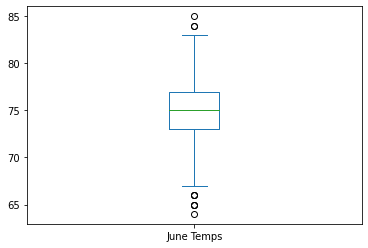

In [44]:
temp_june_df.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

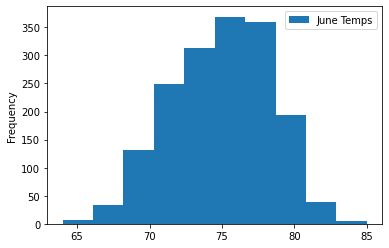

In [45]:
temp_june_df.plot(kind='hist', bins=10)

<AxesSubplot:>

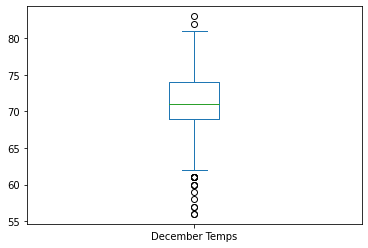

In [46]:
temp_dec_df.plot(kind='box')

<AxesSubplot:ylabel='Frequency'>

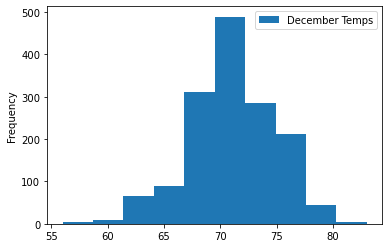

In [47]:
temp_dec_df.plot(kind='hist', bins=10)